In [2]:
import numpy as np
from tensorflow.keras import layers, models, utils, optimizers
import tensorflow as tf
import matplotlib.pyplot as plt
import collections

In [3]:
alltext = open("./data/四世同堂.txt", encoding='utf-8').read()
print(len(set(alltext)))

3631


In [ ]:
#較naive的做法
# charset = {}
# id = 0
# for line in alltext:
#     length = len(line)
#     for k in range(length):
#         w = line[k]
#         if not w in charset:            
#             charset[w]=id
#             id+=1
            
# print(len(charset))

In [4]:
sortedcharset = sorted(set(alltext))
char_indices = dict((c, i) for i, c in enumerate(sortedcharset))
indices_char = dict((i, c) for i, c in enumerate(sortedcharset))
print("char_indices",len(char_indices))

char_indices 3631


In [5]:
#不符合下面固定句長設定的程式要求
#但是可用於計算平均句長
import numpy as np

with open("./data/四世同堂.txt", encoding='utf-8') as fo:
    alltext0 = fo.readlines()

sentence_length_list = []
for line in alltext0:    
    sentence_length_list.append(len(line))

sentencelength = np.mean(sentence_length_list)
print("平均句長",sentencelength)  
print("句子總數",len(alltext0))

平均句長 52.36421842802473
句子總數 13588


In [6]:
print("字元總數",len(alltext))
maxwords = 40
step = 13
sentences = []
next_chars = []
alltext = [char_indices[word] for word in alltext]
for i in range(0, len(alltext)-maxwords, step):
    sentences.append(alltext[i:i+maxwords])
    next_chars.append(alltext[i+maxwords])
print("train_data_size",len(sentences))

vocab_size = len(char_indices)
next_chars = utils.to_categorical(next_chars, num_classes=vocab_size)
sentences = np.array(sentences)
next_chars = np.array(next_chars)

字元總數 711525
train_data_size 54730


In [7]:
from tensorflow.keras import layers, models, utils, optimizers
import tensorflow as tf

model = models.Sequential()
model.add(tf.keras.Input(shape=(maxwords,), name="inputs"))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=64, name="embedding"))
model.add(layers.LSTM(units=128, recurrent_dropout=0.1, dropout=0.1, name="lstm"))
model.add(layers.Dense(units=vocab_size, activation="softmax", name="outputs"))

#optimizer = RMSprop(lr=0.01)
optimizer = optimizers.Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 64)            232384    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
outputs (Dense)              (None, 3631)              468399    
Total params: 799,599
Trainable params: 799,599
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(sentences, next_chars, validation_split=0.05, epochs=3, batch_size=128, verbose=1)

Train on 51993 samples, validate on 2737 samples
Epoch 1/3
51993/51993 [==============================] - 54s 1ms/sample - loss: 5.8764 - val_loss: 5.5973
Epoch 2/3
51993/51993 [==============================] - 53s 1ms/sample - loss: 5.1583 - val_loss: 5.3343
Epoch 3/3
51993/51993 [==============================] - 53s 1ms/sample - loss: 4.7611 - val_loss: 5.2375


In [9]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

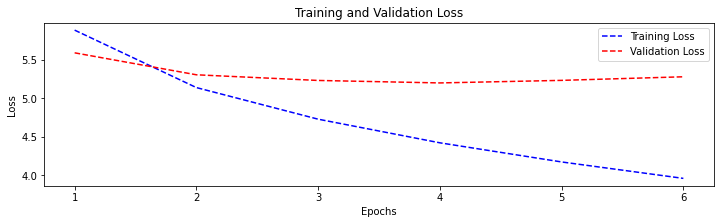

In [11]:
import matplotlib.pyplot as plt

def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
#        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
#         acc = history.history["accuracy"]
#         val_acc = history.history["val_accuracy"]
#         epochs = range(1, len(acc)+1)
#         plt.subplot(1,2,2)
#         plt.plot(epochs, acc, "b-", label="Training Acc")
#         plt.plot(epochs, val_acc, "r--", label="Validation Acc")
#         plt.title("Training and Validation Accuracy")
#         plt.xlabel("Epochs")
#         plt.ylabel("Accuracy")
#         plt.legend()
        plt.show()
        
visual_train_status(history)

In [38]:
import collections
test_words = alltext[123460:123460+40]
print([indices_char[index] for index in test_words])

temp_np = collections.deque(maxlen=40)
#print("test_words",test_words)
temp_np.extend(test_words)
n_words = collections.deque(maxlen=13)
#n_words.extend([0,1,2,3])
#print(temp_np)
for i in range(20):
    #x_t = [index for index in temp_np]    
    #x_t = list(temp_np)
    #x_t = np.array(temp_np)
    x_t = np.expand_dims(temp_np, axis=0)   
    y_t = model.predict(x_t, verbose=0)
    y_t = np.argsort(y_t)
    y_t = np.reshape(y_t, -1)[:40]
    bingo = False
    index = 0
    #print(y_t)
    while not bingo:
        if y_t[index] not in n_words:
            n_words.append(y_t[index])
            bingo = True                    
        index += 1
    
    temp_np.append(y_t[index])     
    #print(y_t[index], end=" ")
    print(indices_char[y_t[index]], end=" ")


['我', '已', '經', '發', '送', '了', '一', '個', '姑', '爺', '，', '還', '得', '再', '給', '親', '家', '母', '打', '幡', '兒', '嗎', '？', '\n', '\n', '你', '們', '找', '陳', '什', '麼', '球', '那', '小', '子', '去', '呀', '！', '死', '的']
幼 瞪 旦 團 嫌 般 率 澀 般 波 番 旦 團 ‘ 1 番 番 陋 私 旦 霞 枉 旦 霞 般 私 拴 匹 1 般 秒 鄙 幼 瞪 旦 團 嫌 枉 陋 綢 